In [1]:
import pandas as pd
from arch import arch_model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
import os
from tqdm import tqdm
import random

DATA Import

In [2]:
# Set seed for Python's built-in random module
random.seed(42)

# Set seed for NumPy
np.random.seed(42)

In [3]:
df = pd.read_csv("EUA_log_return_output.csv")

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [5]:
df

,MO1 Comdty - Last Price,CO1 Comdty - Last Price,XA1 Comdty - Last Price,NG1 COMB Comdty - Last Price,SPX Index - Last Price,SXXP Index - Last Price,MXEU0EN Index - Last Price,SPGTCED Index - Last Price,CAC Index - Last Price,DAX Index - Last Price,VIX Index - Last Price,EURUSD Curncy - Last Price,EURGBP Curncy - Last Price,EURCHF Curncy - Last Price,EURCNY Curncy - Last Price,EURRUB Curncy - Last Price,ECO Index - Last Price,LP01TREU Index - Last Price,XAU Curncy - Last Price,LBEATREU Index - Last Price
Date,,,,,,,,,,,,,,,,,,,,
2013-01-03,-0.026922,-0.002938,-0.012339,-0.010885,-0.002088,0.005243,0.010662,0.014983,-0.003423,-0.002876,-0.008208,-0.010444,-0.001283,-0.000818,-0.010151,-0.006652,0.034590,0.004678,-0.013668,-0.001431
2013-01-04,-0.009677,-0.007429,-0.001129,0.027450,0.004853,0.003480,0.006640,0.011045,0.002375,0.002566,-0.051438,0.001532,0.003659,-0.000819,-0.009787,0.002280,0.004159,0.001315,-0.004753,-0.002003
2013-01-07,0.050564,0.000808,-0.013080,-0.006409,-0.003128,-0.004178,-0.009364,-0.006575,-0.006828,-0.005637,-0.002896,0.003666,0.001008,0.000008,-0.000049,0.003151,-0.023203,0.003139,-0.005559,0.000749
2013-01-08,-0.029713,0.004836,-0.007469,-0.014806,-0.003248,-0.001327,-0.001842,-0.010589,0.000335,-0.004774,-0.012404,-0.002748,0.001105,0.000372,0.005690,-0.003923,-0.001342,0.002827,0.007386,0.001822
2013-01-09,-0.040491,-0.001609,0.000000,-0.033173,0.002652,0.006859,0.008433,0.015040,0.003117,0.003197,0.013854,-0.001300,0.000638,0.000066,-0.001779,0.001410,0.017531,0.001984,-0.000904,0.000608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,-0.029190,-0.018255,0.004133,-0.085500,-0.014688,-0.000717,-0.007822,-0.004684,-0.002658,-0.005284,0.186801,-0.000476,-0.001429,-0.004997,0.000171,-0.004517,-0.043677,0.000000,0.000000,0.001849
2025-01-28,0.011524,0.005305,0.010486,-0.063079,0.009176,0.003599,0.001928,-0.006926,-0.001166,0.006949,-0.086910,-0.005927,-0.001383,-0.003366,-0.015427,0.000339,-0.013014,0.000000,0.000000,-0.000592
2025-01-29,0.032934,-0.011813,-0.002725,0.018271,-0.004690,0.004991,0.002521,0.015562,-0.003157,0.009610,0.009099,-0.000863,-0.001564,0.001981,-0.001337,0.011790,0.002222,0.000000,0.000000,-0.000454


In [6]:
log_returns_scaled = df * 1000

In [7]:
bic_table = pd.DataFrame(columns=["Ticker", "p", "q", "BIC"])

for col_name in tqdm(log_returns_scaled.columns):
    for p in range(1, 10):
        for q in range(1, 10):
            garch_t_model = arch_model(log_returns_scaled[col_name], mean='Zero', vol='Garch', p=p, q=q, dist='t')
            garch_t_result = garch_t_model.fit(disp='off')

            given_bic = garch_t_result.bic

            bic_table = pd.concat([bic_table, pd.DataFrame([{"Ticker": col_name, "p": p, "q": q, "BIC": given_bic}])], ignore_index=True)

bic_table

  0%|          | 0/20 [00:00<?, ?it/s]/var/folders/mq/fwlcfkh5473f1v14fcsfsgq80000gn/T/ipykernel_10005/2343463335.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bic_table = pd.concat([bic_table, pd.DataFrame([{"Ticker": col_name, "p": p, "q": q, "BIC": given_bic}])], ignore_index=True)
 65%|██████▌   | 13/20 [00:46<00:23,  3.35s/it]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer r

,Ticker,p,q,BIC
0,MO1 Comdty - Last Price,1,1,29251.071332
1,MO1 Comdty - Last Price,1,2,29259.116600
2,MO1 Comdty - Last Price,1,3,29267.103889
3,MO1 Comdty - Last Price,1,4,29274.689000
4,MO1 Comdty - Last Price,1,5,29282.199073
...,...,...,...,...
1615,LBEATREU Index - Last Price,9,5,13477.791673
1616,LBEATREU Index - Last Price,9,6,13479.923092
1617,LBEATREU Index - Last Price,9,7,13485.434455
1618,LBEATREU Index - Last Price,9,8,13490.255787


In [8]:
ref_table = bic_table.loc[bic_table.groupby('Ticker')['BIC'].idxmin()]

In [9]:
ref_table

,Ticker,p,q,BIC
648,CAC Index - Last Price,1,1,23054.370236
81,CO1 Comdty - Last Price,1,1,27147.702956
729,DAX Index - Last Price,1,1,23207.687353
1296,ECO Index - Last Price,1,1,27187.836767
1053,EURCHF Curncy - Last Price,1,1,15256.103895
1134,EURCNY Curncy - Last Price,1,1,17733.174518
972,EURGBP Curncy - Last Price,1,1,17813.439443
1216,EURRUB Curncy - Last Price,1,2,22701.914041
891,EURUSD Curncy - Last Price,1,1,18266.720483
1539,LBEATREU Index - Last Price,1,1,13396.180696


In [10]:
garch_returns = pd.DataFrame()

for col_name in log_returns_scaled:
    p = ref_table[ref_table["Ticker"] == col_name]["p"].values[0]
    q = ref_table[ref_table["Ticker"] == col_name]["q"].values[0]

    garch_t_model = arch_model(log_returns_scaled[col_name], mean='Zero', vol='Garch', p=p, q=q, dist='t')
    garch_t_result = garch_t_model.fit(disp='off')

    residulas = garch_t_result.std_resid

    garch_returns[col_name] = residulas

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

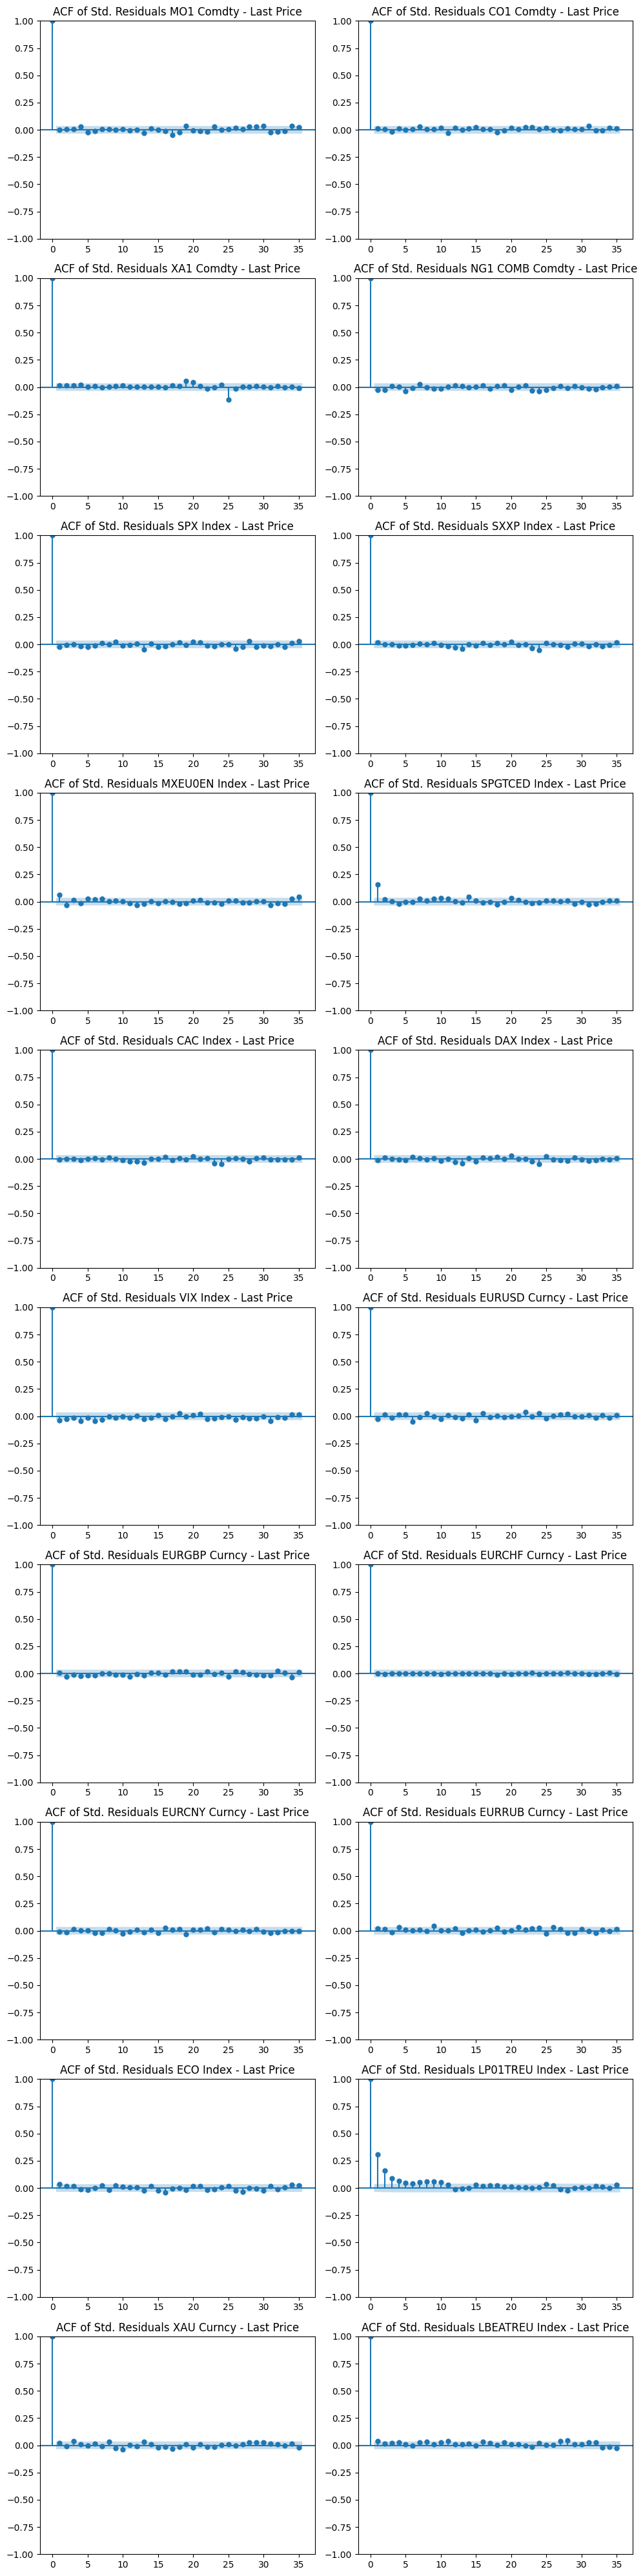

In [12]:
fig, axes = plt.subplots(10, 2, figsize=(10, 40))
axes = axes.flatten()

i = 0
for col_name in log_returns_scaled:
    p = ref_table[ref_table["Ticker"] == col_name]["p"].values[0]
    q = ref_table[ref_table["Ticker"] == col_name]["q"].values[0]

    garch_t_model = arch_model(log_returns_scaled[col_name], mean='Zero', vol='Garch', p=p, q=q, dist='t')
    garch_t_result = garch_t_model.fit(disp='off')

    plot_acf(garch_t_result.std_resid.dropna(), title="ACF of Std. Residuals " + col_name, ax=axes[i])
    i += 1
plt.tight_layout()
plt.show()

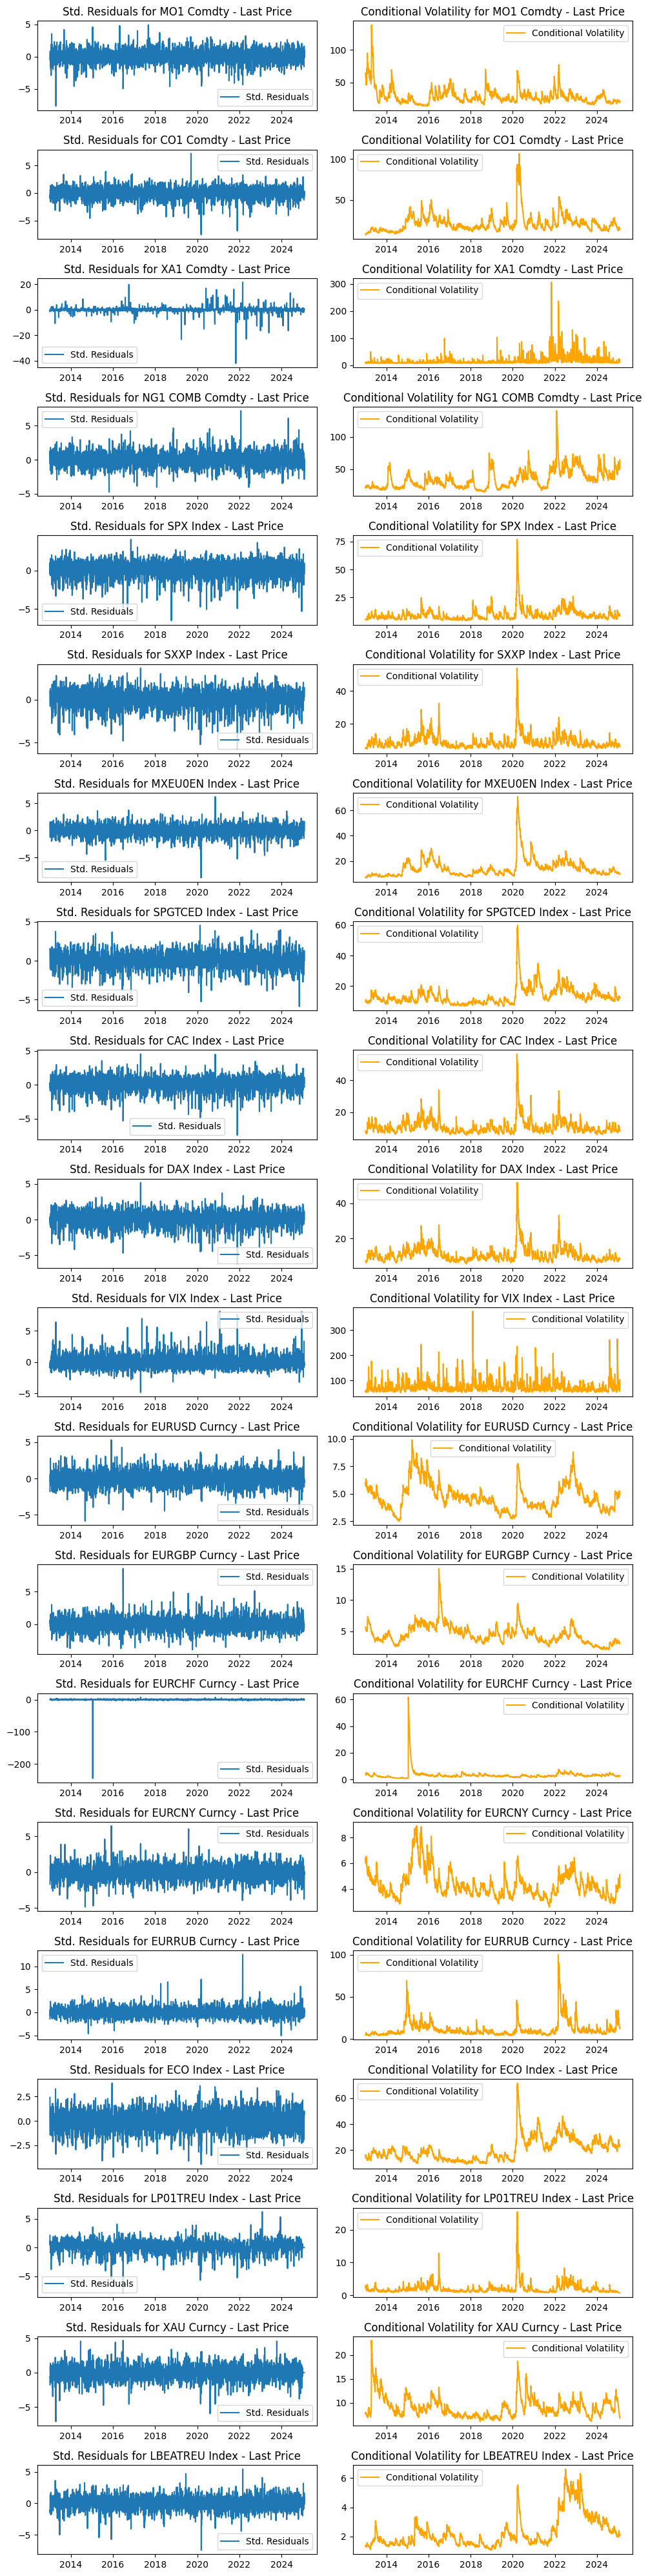

In [13]:
fig, axes = plt.subplots(20, 2, figsize=(10, 40))
axes = axes.flatten()

i = 0
for col_name in log_returns_scaled:
    p = ref_table[ref_table["Ticker"] == col_name]["p"].values[0]
    q = ref_table[ref_table["Ticker"] == col_name]["q"].values[0]

    garch_t_model = arch_model(log_returns_scaled[col_name], mean='Zero', vol='Garch', p=p, q=q, dist='t')
    garch_t_result = garch_t_model.fit(disp='off')

    residuals = garch_t_result.std_resid
    conditional_volatility = garch_t_result.conditional_volatility

    # Plot the residuals
    axes[i].plot(residuals, label='Std. Residuals')
    axes[i].set_title(f'Std. Residuals for {col_name}')
    axes[i].legend()

    # Plot the conditional volatility
    axes[i + 1].plot(conditional_volatility, label='Conditional Volatility', color='orange')
    axes[i + 1].set_title(f'Conditional Volatility for {col_name}')
    axes[i + 1].legend()
    i += 2
plt.tight_layout()
plt.show()

In [14]:
garch_returns.isna().sum()

MO1 Comdty - Last Price         0
CO1 Comdty - Last Price         0
XA1 Comdty - Last Price         0
NG1 COMB Comdty - Last Price    0
SPX Index - Last Price          0
SXXP Index - Last Price         0
MXEU0EN Index - Last Price      0
SPGTCED Index - Last Price      0
CAC Index - Last Price          0
DAX Index - Last Price          0
VIX Index - Last Price          0
EURUSD Curncy - Last Price      0
EURGBP Curncy - Last Price      0
EURCHF Curncy - Last Price      0
EURCNY Curncy - Last Price      0
EURRUB Curncy - Last Price      0
ECO Index - Last Price          0
LP01TREU Index - Last Price     0
XAU Curncy - Last Price         0
LBEATREU Index - Last Price     0
dtype: int64

In [15]:
garch_returns = garch_returns.dropna() / 1000

In [16]:
garch_returns.describe()

,MO1 Comdty - Last Price,CO1 Comdty - Last Price,XA1 Comdty - Last Price,NG1 COMB Comdty - Last Price,SPX Index - Last Price,SXXP Index - Last Price,MXEU0EN Index - Last Price,SPGTCED Index - Last Price,CAC Index - Last Price,DAX Index - Last Price,VIX Index - Last Price,EURUSD Curncy - Last Price,EURGBP Curncy - Last Price,EURCHF Curncy - Last Price,EURCNY Curncy - Last Price,EURRUB Curncy - Last Price,ECO Index - Last Price,LP01TREU Index - Last Price,XAU Curncy - Last Price,LBEATREU Index - Last Price
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000
mean,0.000038,-0.000015,-0.000022,0.000011,0.000049,0.000017,-0.000011,0.000008,0.000014,0.000026,0.000028,-0.000021,-0.000002,-0.000090,-0.000013,0.000047,0.000001,0.000131,0.000015,0.000049
std,0.001000,0.001004,0.001863,0.001002,0.000994,0.000992,0.001002,0.000996,0.000995,0.000983,0.001006,0.001002,0.001002,0.004498,0.000998,0.001018,0.001000,0.000988,0.000991,0.001003
min,-0.007622,-0.007572,-0.041967,-0.004725,-0.006496,-0.005762,-0.008765,-0.005901,-0.007455,-0.006200,-0.004831,-0.005852,-0.003902,-0.244947,-0.004864,-0.005062,-0.004454,-0.007861,-0.007137,-0.007454
25%,-0.000534,-0.000557,-0.000316,-0.000596,-0.000441,-0.000493,-0.000555,-0.000566,-0.000500,-0.000473,-0.000570,-0.000638,-0.000624,-0.000589,-0.000602,-0.000546,-0.000626,-0.000314,-0.000512,-0.000527
50%,0.000023,0.000048,0.000000,0.000000,0.000066,0.000072,0.000030,0.000035,0.000059,0.000065,-0.000072,0.000000,-0.000035,-0.000045,-0.000011,0.000016,0.000019,0.000191,0.000025,0.000057
75%,0.000651,0.000602,0.000333,0.000617,0.000658,0.000611,0.000588,0.000580,0.000624,0.000598,0.000476,0.000601,0.000571,0.000584,0.000571,0.000604,0.000653,0.000691,0.000575,0.000635
max,0.004923,0.007133,0.021469,0.007152,0.004010,0.003658,0.006203,0.004549,0.004537,0.005179,0.008088,0.005302,0.008547,0.007327,0.006455,0.012558,0.003868,0.006193,0.004685,0.005444


In [17]:
n_bins = 3

binned_returns_quantile = garch_returns.copy()

for col in garch_returns.columns:
    # labels = range(1, n_bins + 1)
    labels = ["Low", "Neutral", "High"]
    binned_returns_quantile[col] = pd.qcut(binned_returns_quantile[col], q=n_bins, labels=labels)

In [18]:
binned_returns = binned_returns_quantile

In [19]:
for i in binned_returns.columns:
    new_col_name = i + "_1"
    binned_returns[new_col_name] = binned_returns[i].shift(-1)
binned_returns = binned_returns.dropna()

In [20]:
binned_returns.head(5)

,MO1 Comdty - Last Price,CO1 Comdty - Last Price,XA1 Comdty - Last Price,NG1 COMB Comdty - Last Price,SPX Index - Last Price,SXXP Index - Last Price,MXEU0EN Index - Last Price,SPGTCED Index - Last Price,CAC Index - Last Price,DAX Index - Last Price,...,VIX Index - Last Price_1,EURUSD Curncy - Last Price_1,EURGBP Curncy - Last Price_1,EURCHF Curncy - Last Price_1,EURCNY Curncy - Last Price_1,EURRUB Curncy - Last Price_1,ECO Index - Last Price_1,LP01TREU Index - Last Price_1,XAU Curncy - Last Price_1,LBEATREU Index - Last Price_1
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,Low,Low,Low,Low,Low,High,High,High,Low,Low,...,Low,Neutral,High,Neutral,Low,High,Neutral,Neutral,Low,Low
2013-01-04,Neutral,Low,Neutral,High,High,High,High,High,Neutral,Neutral,...,Neutral,High,Neutral,Neutral,Neutral,High,Low,High,Low,High
2013-01-07,High,Neutral,Low,Neutral,Low,Low,Low,Low,Low,Low,...,Neutral,Low,Neutral,Neutral,High,Low,Neutral,High,High,High
2013-01-08,Low,High,Low,Low,Low,Neutral,Neutral,Low,Neutral,Low,...,High,Neutral,Neutral,Neutral,Neutral,Neutral,High,High,Neutral,High
2013-01-09,Low,Neutral,Neutral,Low,High,High,High,High,High,High,...,Low,High,High,High,Neutral,High,Low,Low,High,Neutral


In [21]:
#binned_returns.to_csv("EUAQuantileEncodedT1.csv")

In [22]:
binned_returns.columns[:20]

Index(['MO1 Comdty - Last Price', 'CO1 Comdty - Last Price',
       'XA1 Comdty - Last Price', 'NG1 COMB Comdty - Last Price',
       'SPX Index - Last Price', 'SXXP Index - Last Price',
       'MXEU0EN Index - Last Price', 'SPGTCED Index - Last Price',
       'CAC Index - Last Price', 'DAX Index - Last Price',
       'VIX Index - Last Price', 'EURUSD Curncy - Last Price',
       'EURGBP Curncy - Last Price', 'EURCHF Curncy - Last Price',
       'EURCNY Curncy - Last Price', 'EURRUB Curncy - Last Price',
       'ECO Index - Last Price', 'LP01TREU Index - Last Price',
       'XAU Curncy - Last Price', 'LBEATREU Index - Last Price'],
      dtype='object')

In [23]:
from itertools import combinations, permutations
from itertools import product

### HC - Method 1

In [24]:
from pgmpy.estimators import BDeuScore # Penalty with prior hyperparameters. Requires equivalent sample size hyperparam.
from pgmpy.estimators import HillClimbSearch

In [25]:
boots_samples_list = []
n_bootstrap_samples = 200

for i in range(n_bootstrap_samples):
    boots_samples_list.append(binned_returns.sample(frac=1, replace=True, random_state=42))

In [26]:
equivalent_sample_size = 10

blacklist = list(permutations(binned_returns.columns[:20], 2)) + list(permutations(binned_returns.columns[20:], 2)) + list(product(binned_returns.columns[20:], binned_returns.columns[:20]))

In [27]:
blacklist

[('MO1 Comdty - Last Price', 'CO1 Comdty - Last Price'),
 ('MO1 Comdty - Last Price', 'XA1 Comdty - Last Price'),
 ('MO1 Comdty - Last Price', 'NG1 COMB Comdty - Last Price'),
 ('MO1 Comdty - Last Price', 'SPX Index - Last Price'),
 ('MO1 Comdty - Last Price', 'SXXP Index - Last Price'),
 ('MO1 Comdty - Last Price', 'MXEU0EN Index - Last Price'),
 ('MO1 Comdty - Last Price', 'SPGTCED Index - Last Price'),
 ('MO1 Comdty - Last Price', 'CAC Index - Last Price'),
 ('MO1 Comdty - Last Price', 'DAX Index - Last Price'),
 ('MO1 Comdty - Last Price', 'VIX Index - Last Price'),
 ('MO1 Comdty - Last Price', 'EURUSD Curncy - Last Price'),
 ('MO1 Comdty - Last Price', 'EURGBP Curncy - Last Price'),
 ('MO1 Comdty - Last Price', 'EURCHF Curncy - Last Price'),
 ('MO1 Comdty - Last Price', 'EURCNY Curncy - Last Price'),
 ('MO1 Comdty - Last Price', 'EURRUB Curncy - Last Price'),
 ('MO1 Comdty - Last Price', 'ECO Index - Last Price'),
 ('MO1 Comdty - Last Price', 'LP01TREU Index - Last Price'),
 ('MO1

In [28]:
learned_structures = []
for i in tqdm(range(len(boots_samples_list))):
    hc = HillClimbSearch(boots_samples_list[i])
    best_model = hc.estimate(scoring_method=BDeuScore(boots_samples_list[i], equivalent_sample_size=equivalent_sample_size), show_progress=False, black_list=blacklist)
    learned_structures.append(best_model.edges())

100%|██████████| 200/200 [01:15<00:00,  2.64it/s]


In [29]:
pair_count = {}
for i in range(len(learned_structures)):
    for outgoing, ingoing in learned_structures[i]:
        key = outgoing + ":" + ingoing
        if key in pair_count:
            pair_count[key] += 1
        else:
            pair_count[key] = 1

In [30]:
sorted_dict_desc = dict(sorted(pair_count.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_desc)
print(len(sorted_dict_desc))

{'MO1 Comdty - Last Price:XAU Curncy - Last Price_1': 200, 'CO1 Comdty - Last Price:MO1 Comdty - Last Price_1': 200, 'XA1 Comdty - Last Price:XA1 Comdty - Last Price_1': 200, 'SPX Index - Last Price:LP01TREU Index - Last Price_1': 200, 'SPX Index - Last Price:SXXP Index - Last Price_1': 200, 'SPX Index - Last Price:VIX Index - Last Price_1': 200, 'SPX Index - Last Price:DAX Index - Last Price_1': 200, 'SPX Index - Last Price:CAC Index - Last Price_1': 200, 'SPX Index - Last Price:LBEATREU Index - Last Price_1': 200, 'SPX Index - Last Price:ECO Index - Last Price_1': 200, 'SXXP Index - Last Price:SXXP Index - Last Price_1': 200, 'SXXP Index - Last Price:CAC Index - Last Price_1': 200, 'MXEU0EN Index - Last Price:MXEU0EN Index - Last Price_1': 200, 'EURUSD Curncy - Last Price:EURCNY Curncy - Last Price_1': 200, 'ECO Index - Last Price:SPGTCED Index - Last Price_1': 200, 'LP01TREU Index - Last Price:LP01TREU Index - Last Price_1': 200, 'LP01TREU Index - Last Price:SPX Index - Last Price_1

In [31]:
most_common_edges = {key: value for key, value in sorted_dict_desc.items() if value >= 100} # 50% of cases - at least
len(most_common_edges)

17

In [32]:
eua_edges = []
for key, value in most_common_edges.items():
    key_split = key.split(":")
    eua_edges.append((key_split[0], key_split[1]))

In [33]:
for i in eua_edges:
    if (i[1], i[0]) in eua_edges:
        eua_edges.remove((i[1], i[0]))

In [34]:
len(eua_edges)

17

In [35]:
G = nx.DiGraph()
G.add_edges_from(eua_edges)

# Check if the graph is acyclic
if nx.is_directed_acyclic_graph(G):
    print("The graph is a DAG!")
else:
    print("The graph contains a cycle!")

The graph is a DAG!


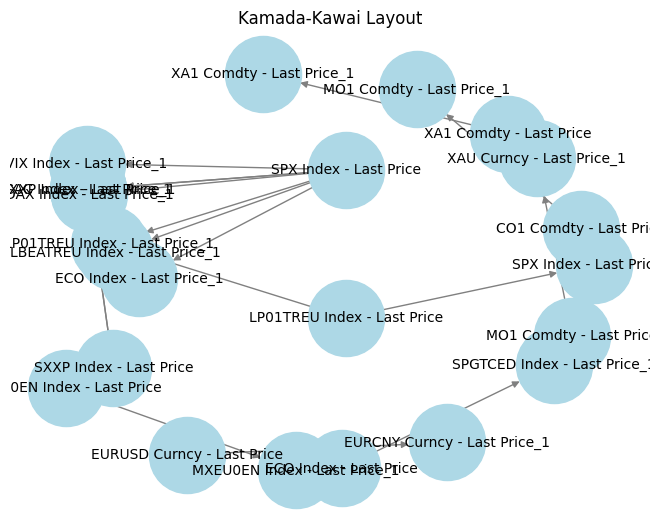

In [36]:
G = nx.DiGraph()
G.add_edges_from(eua_edges)

# Draw the graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10)
plt.title("Kamada-Kawai Layout")
plt.show()

In [37]:
eua_edges

[('MO1 Comdty - Last Price', 'XAU Curncy - Last Price_1'),
 ('CO1 Comdty - Last Price', 'MO1 Comdty - Last Price_1'),
 ('XA1 Comdty - Last Price', 'XA1 Comdty - Last Price_1'),
 ('SPX Index - Last Price', 'LP01TREU Index - Last Price_1'),
 ('SPX Index - Last Price', 'SXXP Index - Last Price_1'),
 ('SPX Index - Last Price', 'VIX Index - Last Price_1'),
 ('SPX Index - Last Price', 'DAX Index - Last Price_1'),
 ('SPX Index - Last Price', 'CAC Index - Last Price_1'),
 ('SPX Index - Last Price', 'LBEATREU Index - Last Price_1'),
 ('SPX Index - Last Price', 'ECO Index - Last Price_1'),
 ('SXXP Index - Last Price', 'SXXP Index - Last Price_1'),
 ('SXXP Index - Last Price', 'CAC Index - Last Price_1'),
 ('MXEU0EN Index - Last Price', 'MXEU0EN Index - Last Price_1'),
 ('EURUSD Curncy - Last Price', 'EURCNY Curncy - Last Price_1'),
 ('ECO Index - Last Price', 'SPGTCED Index - Last Price_1'),
 ('LP01TREU Index - Last Price', 'LP01TREU Index - Last Price_1'),
 ('LP01TREU Index - Last Price', 'SPX 

### AutoCorr - Method 2

In [38]:
for i in garch_returns.columns:
    new_col_name = i + "_1"
    garch_returns[new_col_name] = garch_returns[i].shift(-1)
garch_returns = garch_returns.dropna()

In [39]:
from scipy.signal import correlate

In [40]:
correlate(garch_returns["MO1 Comdty - Last Price"], garch_returns["MO1 Comdty - Last Price_1"], mode='full', method='auto')

array([-3.95311330e-07, -8.37888357e-08,  1.48417540e-07, ...,
        1.41102559e-06, -3.91506562e-07,  2.41851685e-08])

### DBN Training

In [41]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.readwrite import XMLBIFReader
from pgmpy.inference import DBNInference

In [42]:
reader = XMLBIFReader("./Models/HCBDeu10v5.bif")
model = reader.get_model()

non_dyn_edges = model.edges()

In [43]:
dbn = DBN()

In [44]:
for edge in non_dyn_edges:
    print(((edge[0], 0), (edge[1], 0)))
    dbn.add_edge((edge[0], 0), (edge[1], 0))

(('CAC Index - Last Price', 0), ('DAX Index - Last Price', 0))
(('CAC Index - Last Price', 0), ('MXEU0EN Index - Last Price', 0))
(('CAC Index - Last Price', 0), ('SXXP Index - Last Price', 0))
(('CO1 Comdty - Last Price', 0), ('NG1 COMB Comdty - Last Price', 0))
(('ECO Index - Last Price', 0), ('SPX Index - Last Price', 0))
(('ECO Index - Last Price', 0), ('VIX Index - Last Price', 0))
(('EURCNY Curncy - Last Price', 0), ('EURUSD Curncy - Last Price', 0))
(('EURRUB Curncy - Last Price', 0), ('CO1 Comdty - Last Price', 0))
(('EURUSD Curncy - Last Price', 0), ('EURCHF Curncy - Last Price', 0))
(('EURUSD Curncy - Last Price', 0), ('EURGBP Curncy - Last Price', 0))
(('EURUSD Curncy - Last Price', 0), ('EURRUB Curncy - Last Price', 0))
(('EURUSD Curncy - Last Price', 0), ('SPGTCED Index - Last Price', 0))
(('EURUSD Curncy - Last Price', 0), ('XAU Curncy - Last Price', 0))
(('LBEATREU Index - Last Price', 0), ('XAU Curncy - Last Price', 0))
(('LP01TREU Index - Last Price', 0), ('EURGBP Curn

In [45]:
for edge in eua_edges:
    reverting_name = edge[1].replace("_1", "")
    print(((edge[0], 0), (reverting_name, 1)))
    dbn.add_edge((edge[0], 0), (reverting_name, 1))

(('MO1 Comdty - Last Price', 0), ('XAU Curncy - Last Price', 1))
(('CO1 Comdty - Last Price', 0), ('MO1 Comdty - Last Price', 1))
(('XA1 Comdty - Last Price', 0), ('XA1 Comdty - Last Price', 1))
(('SPX Index - Last Price', 0), ('LP01TREU Index - Last Price', 1))
(('SPX Index - Last Price', 0), ('SXXP Index - Last Price', 1))
(('SPX Index - Last Price', 0), ('VIX Index - Last Price', 1))
(('SPX Index - Last Price', 0), ('DAX Index - Last Price', 1))
(('SPX Index - Last Price', 0), ('CAC Index - Last Price', 1))
(('SPX Index - Last Price', 0), ('LBEATREU Index - Last Price', 1))
(('SPX Index - Last Price', 0), ('ECO Index - Last Price', 1))
(('SXXP Index - Last Price', 0), ('SXXP Index - Last Price', 1))
(('SXXP Index - Last Price', 0), ('CAC Index - Last Price', 1))
(('MXEU0EN Index - Last Price', 0), ('MXEU0EN Index - Last Price', 1))
(('EURUSD Curncy - Last Price', 0), ('EURCNY Curncy - Last Price', 1))
(('ECO Index - Last Price', 0), ('SPGTCED Index - Last Price', 1))
(('LP01TREU Ind

In [46]:
dbn.edges()

OutEdgeView([(<DynamicNode(CAC Index - Last Price, 0) at 0x3064178c0>, <DynamicNode(DAX Index - Last Price, 0) at 0x3163a6210>), (<DynamicNode(CAC Index - Last Price, 0) at 0x3064178c0>, <DynamicNode(MXEU0EN Index - Last Price, 0) at 0x316456450>), (<DynamicNode(CAC Index - Last Price, 0) at 0x3064178c0>, <DynamicNode(SXXP Index - Last Price, 0) at 0x306457a50>), (<DynamicNode(CAC Index - Last Price, 1) at 0x3163a6710>, <DynamicNode(DAX Index - Last Price, 1) at 0x306a3cb00>), (<DynamicNode(CAC Index - Last Price, 1) at 0x3163a6710>, <DynamicNode(MXEU0EN Index - Last Price, 1) at 0x3164cc8d0>), (<DynamicNode(CAC Index - Last Price, 1) at 0x3163a6710>, <DynamicNode(SXXP Index - Last Price, 1) at 0x30699aa80>), (<DynamicNode(MXEU0EN Index - Last Price, 0) at 0x316456450>, <DynamicNode(CO1 Comdty - Last Price, 0) at 0x3164c7890>), (<DynamicNode(MXEU0EN Index - Last Price, 0) at 0x316456450>, <DynamicNode(EURRUB Curncy - Last Price, 0) at 0x3164c7a10>), (<DynamicNode(MXEU0EN Index - Last P

In [47]:
dbn_data = binned_returns.copy()

In [48]:
for i in dbn_data.columns:
    if '_1' in i:
        new_col_name = (i.replace("_1", ""), 1)
    else:
        new_col_name = (i, 0)
    dbn_data = dbn_data.rename(columns={i: new_col_name})

In [49]:
dbn_data

,"(MO1 Comdty - Last Price, 0)","(CO1 Comdty - Last Price, 0)","(XA1 Comdty - Last Price, 0)","(NG1 COMB Comdty - Last Price, 0)","(SPX Index - Last Price, 0)","(SXXP Index - Last Price, 0)","(MXEU0EN Index - Last Price, 0)","(SPGTCED Index - Last Price, 0)","(CAC Index - Last Price, 0)","(DAX Index - Last Price, 0)",...,"(VIX Index - Last Price, 1)","(EURUSD Curncy - Last Price, 1)","(EURGBP Curncy - Last Price, 1)","(EURCHF Curncy - Last Price, 1)","(EURCNY Curncy - Last Price, 1)","(EURRUB Curncy - Last Price, 1)","(ECO Index - Last Price, 1)","(LP01TREU Index - Last Price, 1)","(XAU Curncy - Last Price, 1)","(LBEATREU Index - Last Price, 1)"
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,Low,Low,Low,Low,Low,High,High,High,Low,Low,...,Low,Neutral,High,Neutral,Low,High,Neutral,Neutral,Low,Low
2013-01-04,Neutral,Low,Neutral,High,High,High,High,High,Neutral,Neutral,...,Neutral,High,Neutral,Neutral,Neutral,High,Low,High,Low,High
2013-01-07,High,Neutral,Low,Neutral,Low,Low,Low,Low,Low,Low,...,Neutral,Low,Neutral,Neutral,High,Low,Neutral,High,High,High
2013-01-08,Low,High,Low,Low,Low,Neutral,Neutral,Low,Neutral,Low,...,High,Neutral,Neutral,Neutral,Neutral,Neutral,High,High,Neutral,High
2013-01-09,Low,Neutral,Neutral,Low,High,High,High,High,High,High,...,Low,High,High,High,Neutral,High,Low,Low,High,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,High,Neutral,Low,High,Low,Neutral,Low,Neutral,High,Neutral,...,High,Neutral,Low,Low,Neutral,Neutral,Low,Neutral,Neutral,High
2025-01-27,Low,Low,High,Low,Low,Neutral,Low,Low,Low,Low,...,Low,Low,Low,Low,Low,Neutral,Low,Neutral,Neutral,Neutral
2025-01-28,High,Neutral,High,Low,High,High,Neutral,Low,Neutral,High,...,Neutral,Neutral,Low,High,Neutral,High,Neutral,Neutral,Neutral,Neutral


In [50]:
dbn.fit(dbn_data, estimator="MLE")

In [51]:
dbn.initialize_initial_state()

In [52]:
dbn.get_cpds()

[<TabularCPD representing P((MXEU0EN Index - Last Price, 0):3 | (CAC Index - Last Price, 0):3, (SXXP Index - Last Price, 0):3) at 0x3164d2060>,
 <TabularCPD representing P((EURRUB Curncy - Last Price, 0):3 | (EURUSD Curncy - Last Price, 0):3, (MXEU0EN Index - Last Price, 0):3) at 0x3164d0f80>,
 <TabularCPD representing P((ECO Index - Last Price, 0):3 | (SPGTCED Index - Last Price, 0):3) at 0x3164d16d0>,
 <TabularCPD representing P((DAX Index - Last Price, 0):3 | (CAC Index - Last Price, 0):3, (SXXP Index - Last Price, 0):3) at 0x31649bbf0>,
 <TabularCPD representing P((XAU Curncy - Last Price, 0):3 | (EURUSD Curncy - Last Price, 0):3, (LBEATREU Index - Last Price, 0):3) at 0x3164d1d90>,
 <TabularCPD representing P((MO1 Comdty - Last Price, 0):3 | (MXEU0EN Index - Last Price, 0):3, (XA1 Comdty - Last Price, 0):3) at 0x3164d10a0>,
 <TabularCPD representing P((CAC Index - Last Price, 0):3 | (SPGTCED Index - Last Price, 0):3, (SPX Index - Last Price, 0):3) at 0x120664680>,
 <TabularCPD rep

In [53]:
# for cpd in dbn.get_cpds():
#     print(cpd)
from pgmpy.factors.discrete.CPD import TabularCPD

def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

In [54]:
cpd = dbn.get_cpds(node=("MO1 Comdty - Last Price", 1))
print(cpd.state_names)
print_full(cpd)
# print(cpd.values)
# print(cpd.variable_card)

{<DynamicNode(MO1 Comdty - Last Price, 1) at 0x31651bd10>: [0, 1, 2], <DynamicNode(CO1 Comdty - Last Price, 0) at 0x31651bcb0>: [0, 1, 2], <DynamicNode(MXEU0EN Index - Last Price, 1) at 0x31651b530>: [0, 1, 2], <DynamicNode(XA1 Comdty - Last Price, 1) at 0x31651bdd0>: [0, 1, 2]}
+---------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+-------------------

In [55]:
dbn.check_model()

True

In [56]:
dbn.edges()

OutEdgeView([(<DynamicNode(CAC Index - Last Price, 0) at 0x3064178c0>, <DynamicNode(DAX Index - Last Price, 0) at 0x3163a6210>), (<DynamicNode(CAC Index - Last Price, 0) at 0x3064178c0>, <DynamicNode(MXEU0EN Index - Last Price, 0) at 0x316456450>), (<DynamicNode(CAC Index - Last Price, 0) at 0x3064178c0>, <DynamicNode(SXXP Index - Last Price, 0) at 0x306457a50>), (<DynamicNode(CAC Index - Last Price, 1) at 0x3163a6710>, <DynamicNode(DAX Index - Last Price, 1) at 0x306a3cb00>), (<DynamicNode(CAC Index - Last Price, 1) at 0x3163a6710>, <DynamicNode(MXEU0EN Index - Last Price, 1) at 0x3164cc8d0>), (<DynamicNode(CAC Index - Last Price, 1) at 0x3163a6710>, <DynamicNode(SXXP Index - Last Price, 1) at 0x30699aa80>), (<DynamicNode(MXEU0EN Index - Last Price, 0) at 0x316456450>, <DynamicNode(CO1 Comdty - Last Price, 0) at 0x3164c7890>), (<DynamicNode(MXEU0EN Index - Last Price, 0) at 0x316456450>, <DynamicNode(EURRUB Curncy - Last Price, 0) at 0x3164c7a10>), (<DynamicNode(MXEU0EN Index - Last P

In [57]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (for example, 'A', 'B', 'C' etc.)
G.add_nodes_from(dbn_data.columns)

# Add edges to the graph
G.add_edges_from(dbn.edges())

# Check if the graph has cycles
if nx.is_directed_acyclic_graph(G):
    print("The graph is acyclic (no cycles).")
else:
    print("The graph has cycles.")

The graph is acyclic (no cycles).


In [58]:
# model_graphviz = dbn.to_graphviz()

# # Plot the model.
# model_graphviz.draw("./DAGoutput/DBNtestv2.png", prog="dot")

In [59]:
#inference = DBNInference(dbn)

In [60]:
# predictions = inference.query(variables=[("MO1 Comdty - Last Price", 1)])

# # Display the predictions
# print(predictions)

##